# Artificial Neural Networks 

## Introduction 

<img src="https://media.springernature.com/original/springer-static/image/art%3A10.1007%2Fs40846-016-0191-3/MediaObjects/40846_2016_191_Fig1_HTML.gif">

<p style="text-align: justify;">Artificial Neural Networks are mathematical models inspired by the human brain, specifically the ability to learn, process, and perform tasks. The Artificial Neural Networks are powerful tools that assist in solving complex problems linked mainly in the area of combinatorial optimization and machine learning. In this context, artificial neural networks have the most varied applications possible, as such models can adapt to the situations presented, ensuring a gradual increase in performance without any human interference. We can say that the Artificial Neural Networks are potent methods can give computers a new possibility, that is, a machine does not get stuck to preprogrammed rules and opens up various options to learn from its own mistakes.</p>

## Biologic Model

<img src="https://www.neuroskills.com/images/photo-500x500-neuron.png">
<p style="text-align: justify;">Artificial neurons are designed to mimic aspects of their biological counterparts. The neuron is one of the fundamental units that make up the entire brain structure of the central nervous system; such cells are responsible for transmitting information through the electrical potential difference in their membrane. In this context, a biological neuron can be divided as follows.</p>

**Dendrites** – are thin branches located in the nerve cell. These cells act on receiving nerve input from other parts of our body.

**Soma** – acts as a summation function. As positive and negative signals (exciting and inhibiting, respectively) arrive in the soma from the dendrites they are added together.

**Axon** – gets its signal from the summation behavior which occurs inside the soma. It is formed by a single extended filament located throughout the neuron. The axon is responsible for sending nerve impulses to the external environment of a cell.

## Artificial Neuron as Mathematic Notation
In general terms, an input X is multiplied by a weight W and added a bias b producing the net activation. 
<img style="max-width:60%;max-height:60%;" src="https://miro.medium.com/max/1290/1*-JtN9TWuoZMz7z9QKbT85A.png">

We can summarize an artificial neuron with the following mathematical expression:
$$
\hat{y} = f\left(\text{net}\right)= f\left(\vec{w}\cdot\vec{x}+b\right) = f\left(\sum_{i=1}^{n}{w_i x_i + b}\right)
$$

## The SingleLayer Perceptron

<p style="text-align: justify;">The Perceptron and its learning algorithm pioneered the research in neurocomputing. the perceptron is an algorithm for supervised learning of binary classifiers [1]. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.<p>
    
<img src="https://www.edureka.co/blog/wp-content/uploads/2017/12/Perceptron-Learning-Algorithm_03.gif">
    
#### References
    
- Freund, Y.; Schapire, R. E. (1999). "Large margin classification using the perceptron algorithm" (PDF). Machine Learning

- Aizerman, M. A.; Braverman, E. M.; Rozonoer, L. I. (1964). "Theoretical foundations of the potential function method in pattern recognition learning". Automation and Remote Control. 25: 821–837.
 
- Mohri, Mehryar and Rostamizadeh, Afshin (2013). Perceptron Mistake Bounds.

## The SingleLayer Perceptron Learning
Learning goes by calculating the prediction of the perceptron:

### Basic Neuron 
$$
\hat{y} = f\left(\vec{w}\cdot\vec{x} + b) = f( w_{1}x_{1} + w_2x_{2} + \cdots + w_nx_{n}+b\right)\,
$$

After that, we update the weights and the bias using as:

$$
\hat{w_i} = w_i + \alpha (y - \hat{y}) x_{i} \,,\  i=1,\ldots,n\,;\\
$$
$$
\hat{b} = b + \alpha (y - \hat{y})\,.
$$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate # 0.5 - 0.01 * 0.5 = 0.45
        
    def activation(self, net):
        answer = 1 if net > 0 else 0
        return answer
    
    def neuron(self, inputs):
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture
    
    def neuron_propagate(self, inputs):  #Forward propogation
        processing = self.neuron(inputs)
        return self.activation(processing) 
    
    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [W + X * self.learningRate * (output - output_prev)
                       for (W, X) in zip(self.weights, inputs)]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.abs(output_prev - output)
        return error_calculation

In [4]:
data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))
data.head()

,x1,x2
0,0.779582,0.177076
1,0.389721,0.451863
2,0.470084,0.773276
3,0.499453,0.925797
4,0.263631,0.980120


In [5]:
def show_dataset(data, ax):
    data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
    data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
    plt.grid()
    plt.title(' My Dataset')
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)
    
def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

data['y'] = data.apply(testing, axis=1)

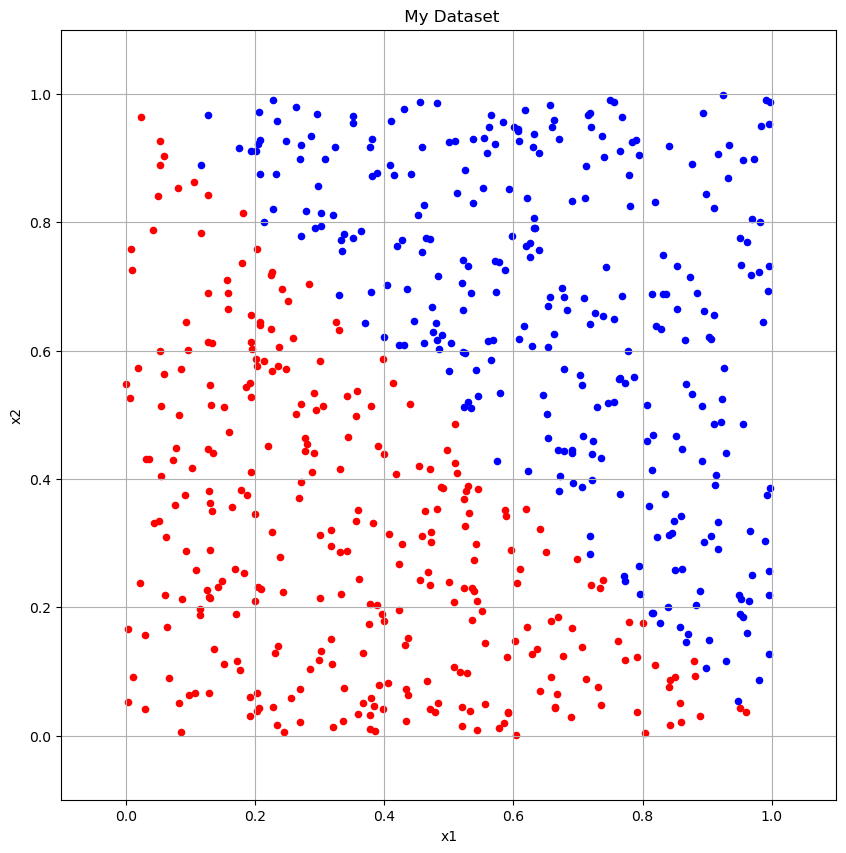

In [6]:
fig = plt.figure(figsize=(10,10))
show_dataset(data, fig.gca())

In [7]:
InitialWeights = [0.1, 0.1]
InitialBias = 0.01
LearningRate = 0.1
SLperceptron = SingleLayerPerceptron(InitialWeights, 
                                     InitialBias,
                                     LearningRate)

C:\Users\sadiq\AppData\Local\Temp\ipykernel_32228\1628991853.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line[2])
C:\Users\sadiq\AppData\Local\Temp\ipykernel_32228\1628991853.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line[2])
C:\Users\sadiq\AppData\Local\Temp\ipykernel_32228\1628991853.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line[2])
C:\Users\sadiq\AppData\Local\Temp\ipykernel_32228\1628991853.py:17:

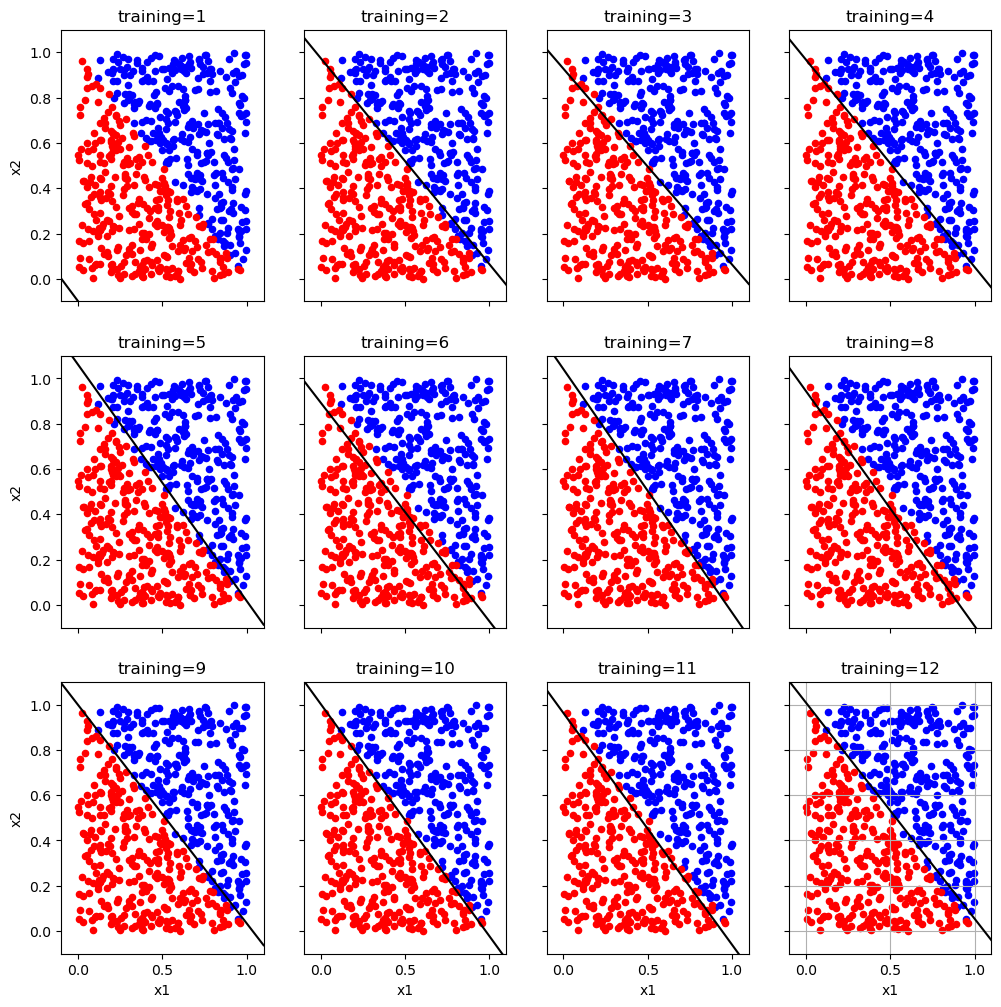

In [8]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()
        
    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)
    
def trainingData(SinglePerceptron, inputs):
    count = 0 
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2], 
                                                  line[2])
    
    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]
    
    ax.plot(xlim, x2, color="black")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)